In [1]:
import numpy as np
from numpy.fft import fft2, ifft2
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import measure

# Analiza obrazów

Spis treści:
1. [Wczytanie obrazów](#wczytywanie-obrazów)
2. [Domena częstotliwości](#domena-częstotliwości)
   - [Moduł współczynników Fouriera](#moduł-współczynników-fouriera)
   - [Faza współczynników Fouriera](#faza-współczynników-fouriera)
3. [Korelacja wzorca i obrazu](#korelacja-wzorca-i-obrazu)
4. [Wyświetlanie obrazów](#wyświetlanie-obrazów)
   - [Moduły, fazy i korelacje](#moduły-fazy-i-korelacje)
   - [Miejsca występowania wzorca](#miejsca-występowania-wzorca)
   - [Wykryte wzorce](#wykryte-wzorce)
5. [Rezultaty](#rezultaty)
   - [Ryby](###ryby)
   - [Tekst](#tekst)

## Wczytywanie obrazów

In [2]:
def load_photo(filename, grayscale=False, reverse_colors=False):
    image = Image.open(f'resources/{filename}')
    if grayscale:
        image = ImageOps.grayscale(image)
    if reverse_colors:
        image = ImageOps.invert(image)
    return np.array(image)

## Domena częstotliwości

### Moduł

In [3]:
def dft_modulus(image):
    return np.abs(np.log(fft2(image)))

### Faza

In [4]:
def dft_phase(image):
    return np.angle(fft2(image))

## Korelacja wzorca i obrazu

In [5]:
def correlation(image, sample):
    return np.real(ifft2(np.multiply(fft2(np.array(image)), fft2(np.rot90(sample, 2), np.array(image).shape))))

## Wyświeltanie obrazów

### Moduły, fazy, korelacja

In [6]:
def display_image(image, title, ratio=50):
    image = 255 * image / np.max(image)
    fig, ax = plt.subplots(figsize=(image.shape[0]//ratio, image.shape[1]//ratio))
    ax.set_title(title)
    ax.imshow(image, cmap='gray')
    plt.show()

### Miejsca występowania wzorca

In [7]:
def display_found_sample(image, image_RGB, sample, title, confidence=0.9, ratio=50):
    img_cor = correlation(image, sample)
    image_RGB_copy = np.copy(image_RGB)
    image_RGB_copy[img_cor < np.max(img_cor) * confidence] = 0.

    for i, j, _ in np.argwhere(image_RGB_copy > 0):
        for x in range(1, sample.shape[0]):
            for y in range(1, sample.shape[1]):
                image_RGB_copy[i-x, j-y] = image_RGB[i-x, j-y]
    
    fig, ax = plt.subplots(figsize=(image.shape[0]//ratio, image.shape[1]//ratio))
    ax.set_title(title) 
    ax.imshow(image_RGB_copy)
    plt.show()

### Wykryte wzorce

In [8]:
def display_overlayed(image, image_RGB, sample, title, confidence=0.9, ratio=50):
    fig, ax = plt.subplots(figsize=(image.shape[0]//ratio, image.shape[1]//ratio))
    ax.imshow(image_RGB)

    img_cor = correlation(image, sample)
    img_cor[img_cor<np.max(img_cor)*confidence] = 0.

    for i, j in np.argwhere(img_cor!=0.):
        ax.add_patch(patches.Rectangle((j,i), -sample.shape[1], -sample.shape[0], edgecolor='r', facecolor='none'))

    found_pixels = len(measure.find_contours(img_cor, confidence*np.max(img_cor)))
    ax.set_title(f'{title} - {found_pixels} objects found')
    plt.show()

## Rezultaty

### Ryby

Wczytanie zdjęcia oraz wzorca

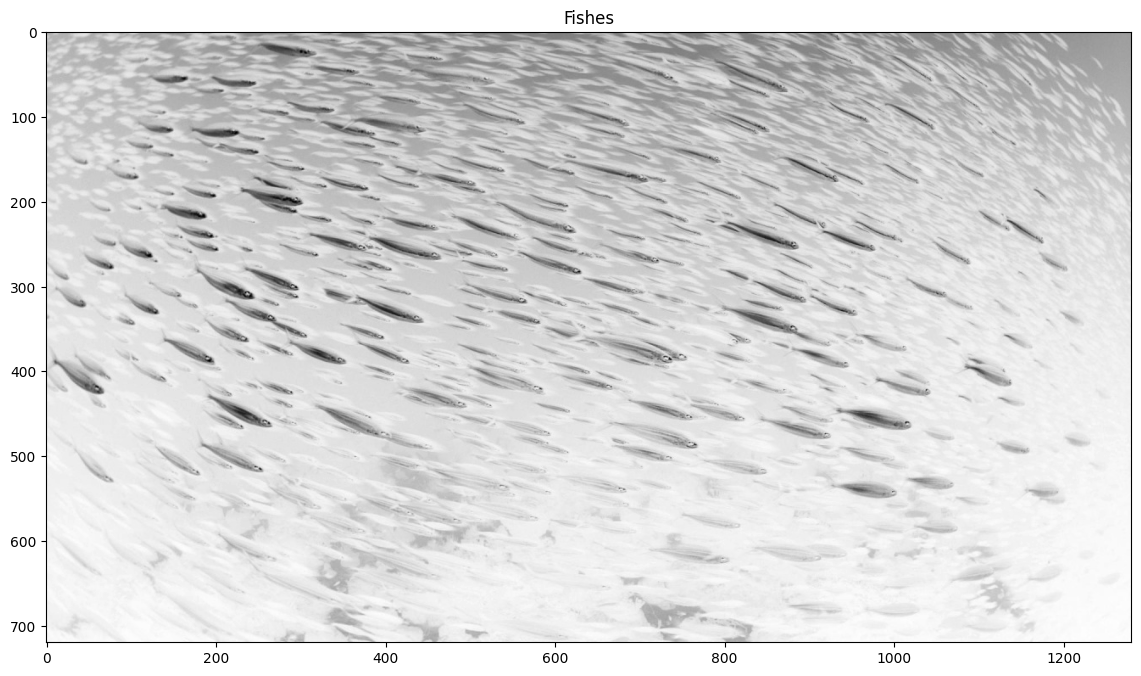

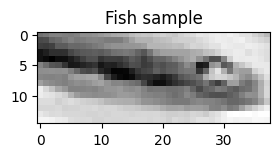

In [9]:
fishes = load_photo('fish.jpg', grayscale=True)
fishes_RGB = load_photo('fish.jpg')
fish = load_photo('fish_sample.png', grayscale=True)

display_image(fishes, 'Fishes')
display_image(fish, 'Fish sample', ratio=5)

Korelacja wzorca z obrazem - jaśniejsze miejsca oznaczają większe podobieństwo

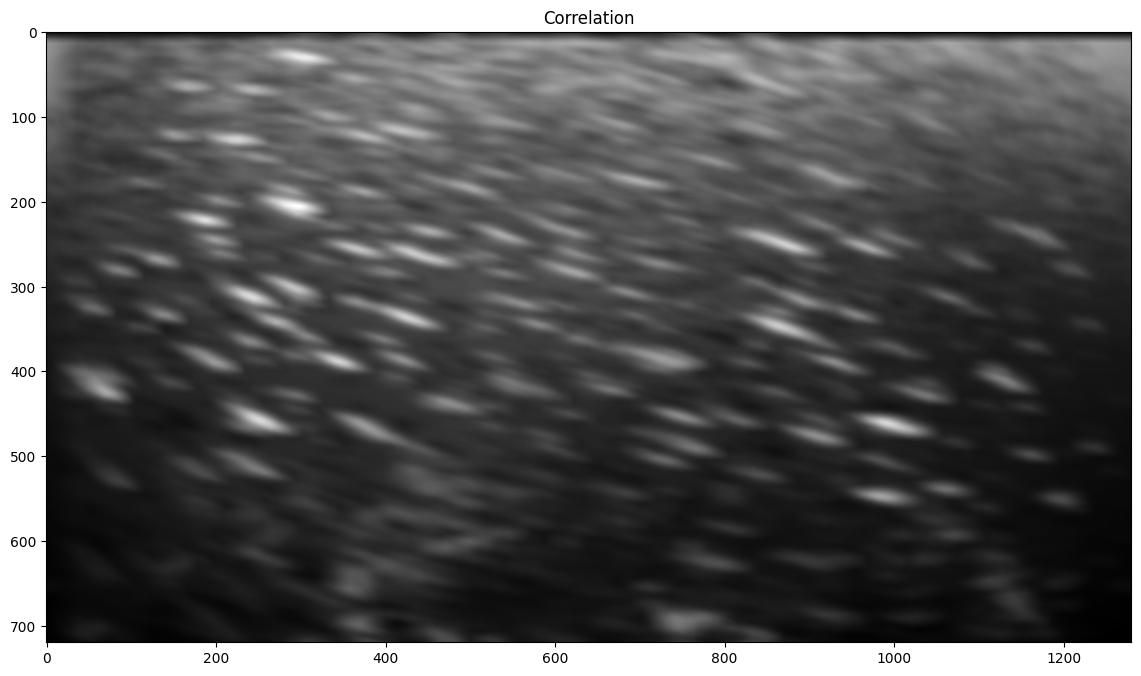

In [10]:
display_image(correlation(fishes, fish), title='Correlation')

Miejsca występowania wzorca z prawdopodobieństwem 95%

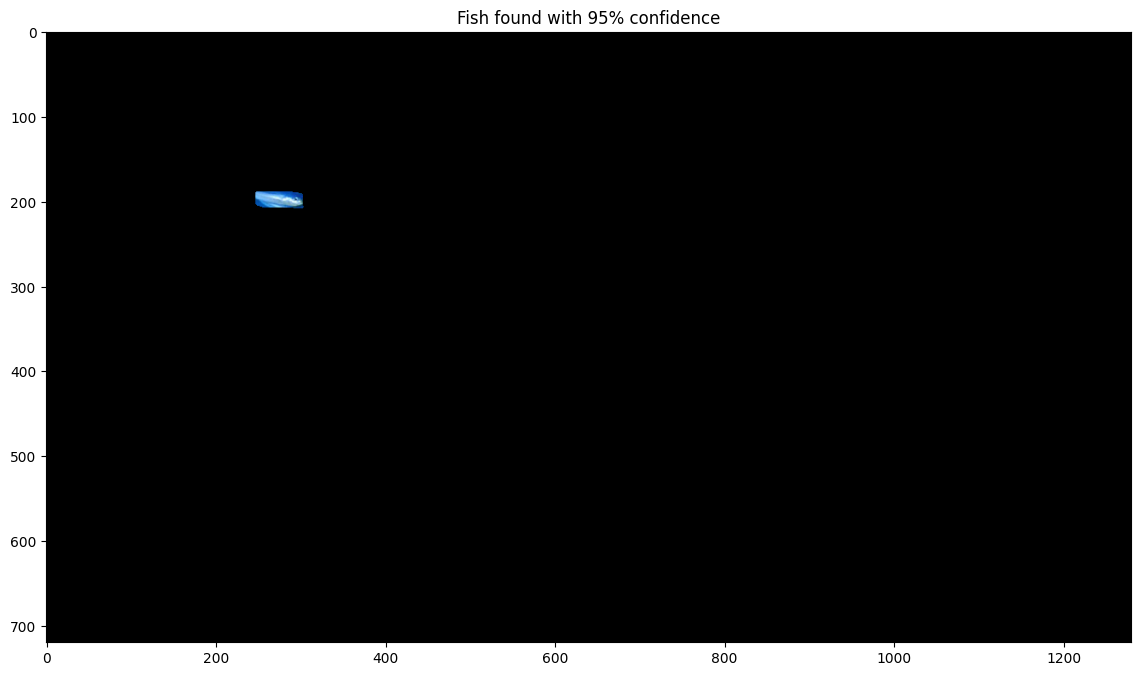

In [11]:
display_found_sample(fishes, fishes_RGB, fish, 'Fish found with 95% confidence', confidence=0.95)

Nałożenie wykrytych wzorców na obraz

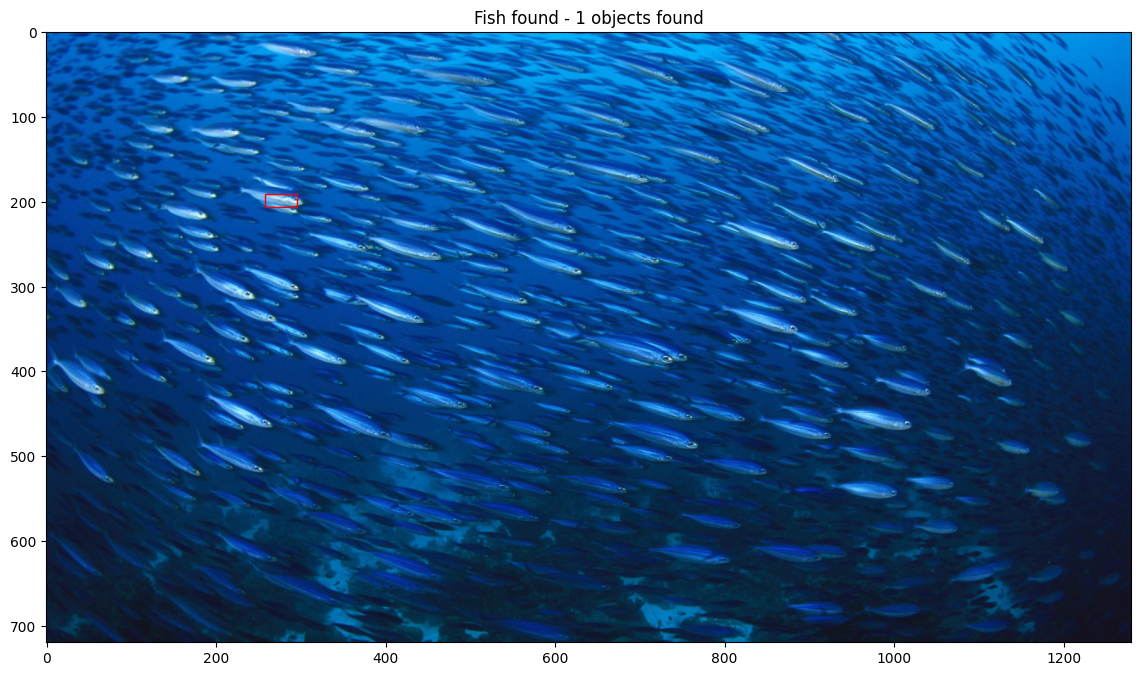

In [12]:
display_overlayed(fishes, fishes_RGB, fish, 'Fish found', confidence=0.9999)

### Tekst

Wczytanie zdjęcia oraz wzorca - kolory dla danych tekstowych zostały odwrócone, aby piksele oznaczające tekst miały mocniejszy sygnał

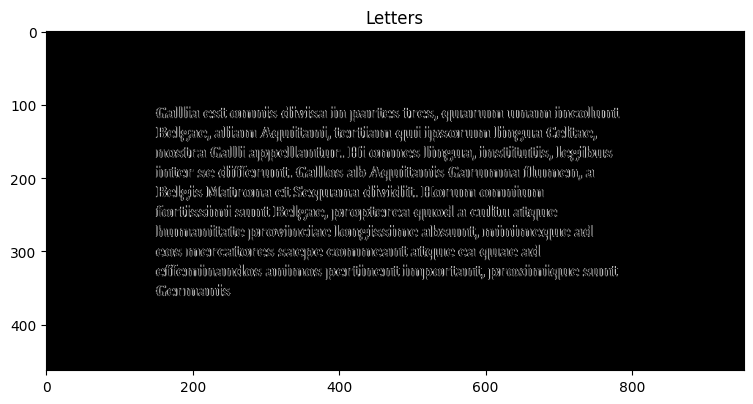

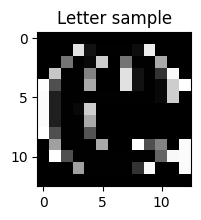

In [13]:
letters = load_photo('galia.png', grayscale=True, reverse_colors=True)
letters_RGB = load_photo('galia.png')
letter = load_photo('galia_sample.png', grayscale=True, reverse_colors=True)

display_image(letters, 'Letters')
display_image(letter, 'Letter sample', ratio=5)

Moduł oraz faza współczynników Fouriera - aby lepiej zobaczyć różnice w obrazie, zastosowano skalowanie logarytmiczne

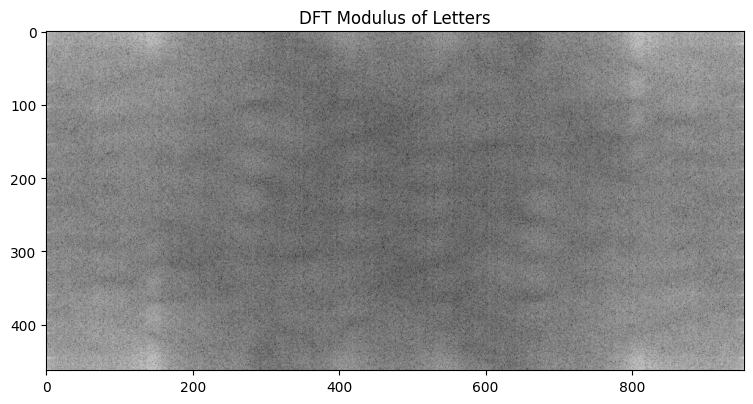

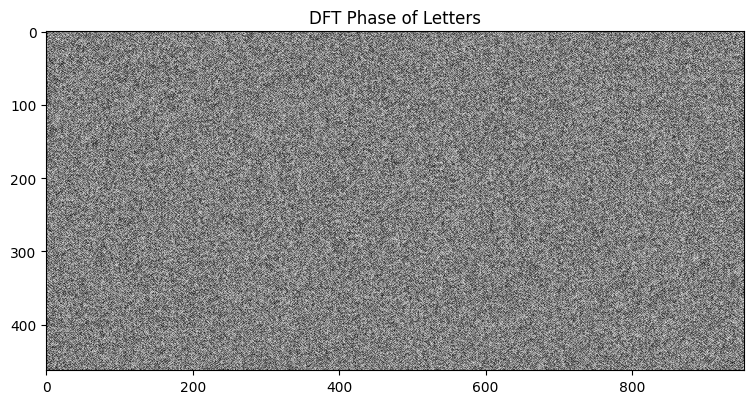

In [14]:
display_image(dft_modulus(letters), 'DFT Modulus of Letters')
display_image(dft_phase(letters), 'DFT Phase of Letters')

Korelacja wzorca z obrazem - jaśniejsze miejsca oznaczają większe podobieństwo

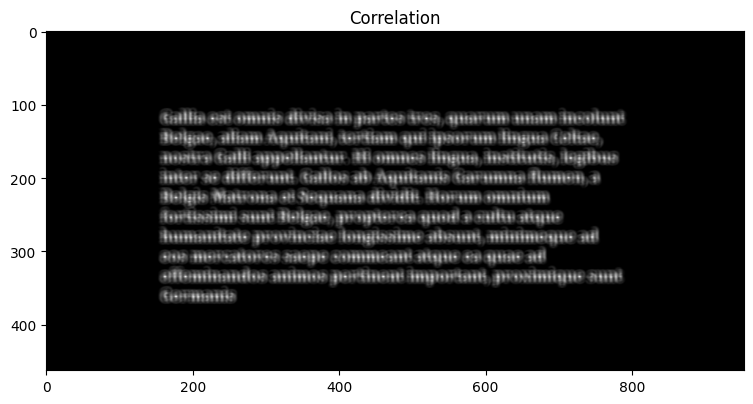

In [15]:
display_image(correlation(letters, letter), title='Correlation')

Miejsca występowania wzorca z prawdopodobieństwem 95% - w tym przypadku wykrycia są pojedynczymi pikselami, co oznacza, że są lepiej dopasowane

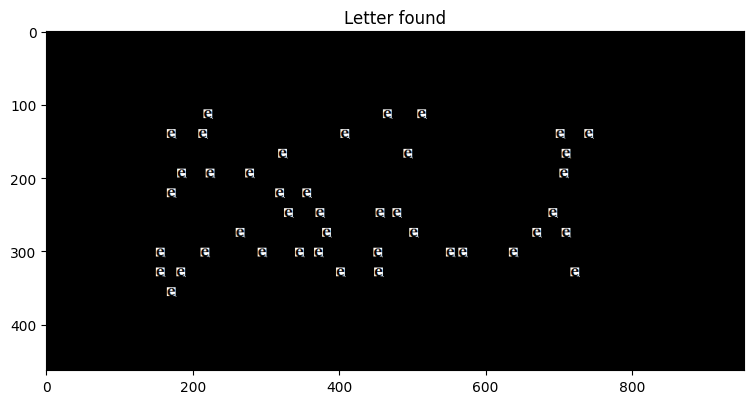

In [16]:
display_found_sample(letters, letters_RGB, letter, 'Letter found', confidence=0.9)

Nałożenie wykrytych wzorców na obraz

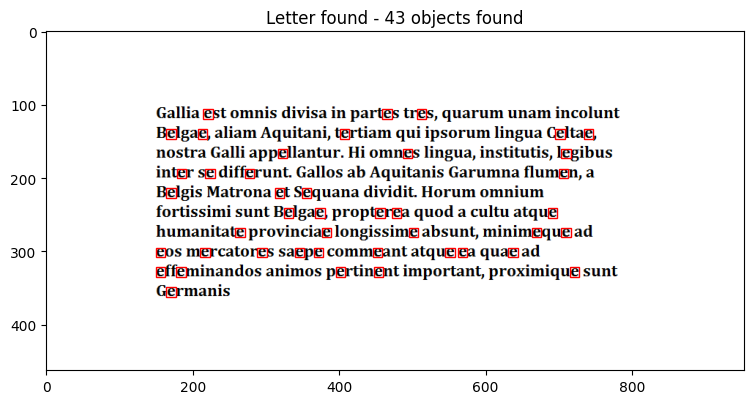

In [17]:
display_overlayed(letters, letters_RGB, letter, 'Letter found', confidence=0.95)

Z przdstawionych wyników wynika, że wykrywanie wzorców na obrazach jest możliwe oraz daje zadowalające rezultaty.

---